**Working with LiPD Data**
LiPD uses nested lists and dictionaries so let's look at these first. 
First, let's look at a basic list.

In [1]:
a = ['spam', 'egg', 'bacon', 'tomato', 'ham', 'lobster']
a

['spam', 'egg', 'bacon', 'tomato', 'ham', 'lobster']

We index a list using square brackets and a number. In python, lists start at 0 so the first value would be a[0].

In [2]:
#Get first value in list.
a[0]

'spam'

You can also slice portions of the list like in R using square brackets and the range you want.

In [4]:
a[2:5]

['bacon', 'tomato', 'ham']

Nested lists are more complicated than the object we just craeted. LiPD is centered on a JSON (JavaScript Object Notation) format. These types of data are built on two structures: a list of **key-value pairs** and an **ordered list of values**. The structures likely change the deeper in the data we go so we need to recognize what data structure we are accessing at each level to properly extract the data.

Difference in structures:

List: animal=['cat','dog','horse','bird']. We index this like above with print(animal[0]).
Dictionary: student= {'name': 'Joe', 'age': '26'}

So in the object 'student':
    'name' and 'age' = the keys
    'Joe' and '26' = the values

In [58]:
animal=['cat','dog','horse','bird']
#Print the first value in list.
print(animal[0])

cat


In [59]:
student= {'name': 'Joe', 'age': 26, 'courses': ['Math', 'CompSci']}
#Print the list values and keys. 
print(student)
#Print just the name of the student. 
print(student['name'])

{'name': 'Joe', 'age': 26, 'courses': ['Math', 'CompSci']}
Joe


Let's move onto our data. The LinkedEarth group has put together a package for analysing their data called Pyleoclim (https://pyleoclim-util.readthedocs.io/en/master/core/ui.html). For this tutorial I've placed a .lpd file in the following directory:
\\storage.rdc.uottawa.ca\1204_gajewski\1-HoloClim\Python\Python Learning
I would copy this folder into your C: drive and then update the object called 'directory' to your path.
To work with this data we need to import a few packages. 

In [60]:
#Import the os module to be able to change your working directory.
import os 
#Import the pyleoclim package. Here we shorten the name to pyleo for efficiency.
import pyleoclim as pyleo
#Import the lipd package

import lipd
#Change this to the directory you are using. Leave the 'r' before your path. 
directory = r"C:\Users\camil\Python\PythonLearning"
#Change the working directory.
#Notice how to call from this package we call the package name followed by '.' then the function.
os.chdir(directory)

#Check you're in the right place.
print(os.getcwd()) 

#Read in our file. 
d = pyleo.Lipd('JR01.Fortin.2017.lpd')


C:\Users\camil\Python\PythonLearning
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: JR01.Fortin.2017.lpd
Finished read: 1 record


In [61]:
print(type(d))


<class 'pyleoclim.core.ui.Lipd'>


In [62]:
#Converts the lpd object to a time series object
ts_list = d.to_tso() 
print(type(ts_list)) 

extracting paleoData...
extracting: JR01.Fortin.2017
Created time series: 2 entries
<class 'list'>


So now we know we have a time series object of the class 'list' with 2 entries. Let's see what they are and what their index values are. 


In [49]:
for idx, item in enumerate(ts_list):
    print(str(idx)+': '+item['dataSetName']+': '+item['paleoData_variableName'])

0: JR01.Fortin.2017: age
1: JR01.Fortin.2017: temperature


In [50]:
#make a series for plotting. It will prompt you to select which index you want. 
JR = pyleo.LipdSeries(ts_list)

0 :  JR01.Fortin.2017 :  LakeSediment :  age
1 :  JR01.Fortin.2017 :  LakeSediment :  temperature


Enter the number of the variable you wish to use:  1


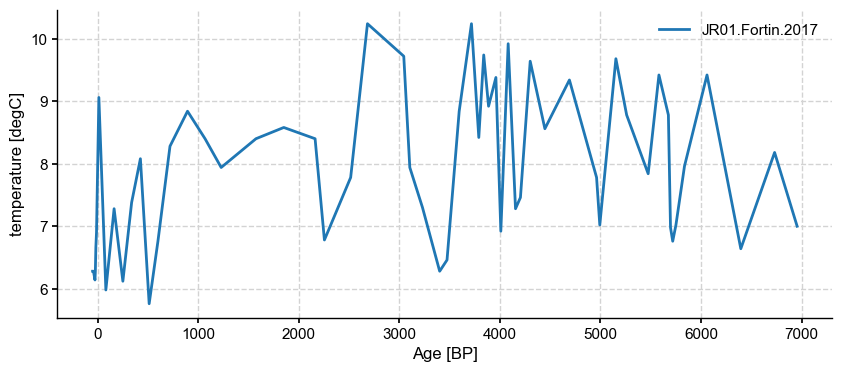

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:xlabel='Age [BP]', ylabel='temperature [degC]'>)

In [52]:
#Plot our series. 
JR.plot()

In [57]:
#Look at data.
print(JR)

  Age [BP]    temperature [degC]
----------  --------------------
   -49                      6.28
   -40.25                   6.28
   -25.25                   6.14
   -21.5                    6.28
   -16.5                    6.66
   -10                      6.9
    13.5                    9.06
    83                      5.98
   164.912                  7.28
   252.077                  6.12
   339.24                   7.38
   426.404                  8.08
   513.568                  5.76
   600.732                  6.76
   720.583                  8.28
   894.911                  8.84
  1069.24                   8.4
  1229.59                   7.94
  1575.41                   8.4
  1852.06                   8.58
  2163.3                    8.4
  2256                      6.78
  2517                      7.78
  2684                     10.24
  3045                      9.72
  3105                      7.94
  3231                      7.3
  3402                      6.28
  3475         

Let's read in multiple .lpd files since we're rarely going to only be analyzing a single site. 

In [67]:
#This will read in all the .lpd files present in our current directory. 
data = pyleo.Lipd('.')

Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 7 LiPD file(s)
reading: HangingLake.Kurek.2009.lpd
reading: JR01.Fortin.2017.lpd
reading: KR02Chironomid.Fortin.2010.lpd
reading: KR02Pollen.Peros.2008.lpd
reading: LacNoir.Pollen.Canada.lpd
reading: LacPatricia.McAndrews.1983.lpd
reading: LB1.Gajewski.1993.lpd
Finished read: 7 records


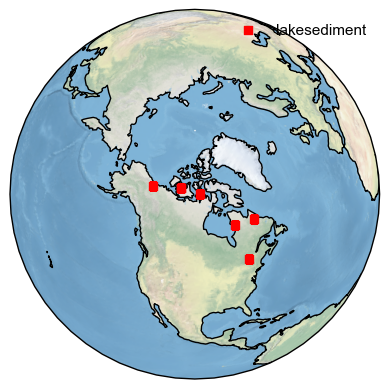

(<Figure size 640x480 with 1 Axes>, <GeoAxesSubplot:>)

In [ ]:
#Map the sites by type. Here they are all lake sediment. Note the crappy legend at the top.
data.mapAllArchive(projection='Orthographic', 
                   proj_default={'central_longitude':-100, 'central_latitude':70},
                   lgd_kwargs={'loc':'lower right'},
                   color='red')

So we have multiple series to work with here. Let's enumerate the available timeseries.

In [111]:
ts_list_data = data.to_tso()
for idx, item in enumerate(ts_list_data):
    if 'archiveType' in item.keys():
        at = item['archiveType']
    else:
        at ='other'
    print(str(idx)+': '+item['dataSetName']+': '+at + ': ' +item['paleoData_variableName'])

extracting paleoData...
extracting: HangingLake.Kurek.2009
extracting: JR01.Fortin.2017
extracting: KR02Chironomid.Fortin.2010
extracting: KR02Pollen.Peros.2008
extracting: LacNoir.Pollen.Canada
extracting: LacPatricia.McAndrews.1983
extracting: LB1.Gajewski.1993
Created time series: 41 entries
0: HangingLake.Kurek.2009: LakeSediment: Chironomid_C
1: HangingLake.Kurek.2009: LakeSediment: year
2: HangingLake.Kurek.2009: LakeSediment: age
3: HangingLake.Kurek.2009: LakeSediment: temperature
4: HangingLake.Kurek.2009: LakeSediment: age
5: HangingLake.Kurek.2009: LakeSediment: ageUncertainty
6: JR01.Fortin.2017: LakeSediment: age
7: JR01.Fortin.2017: LakeSediment: temperature
8: KR02Chironomid.Fortin.2010: LakeSediment: depth
9: KR02Chironomid.Fortin.2010: LakeSediment: age
10: KR02Chironomid.Fortin.2010: LakeSediment: temperature
11: KR02Chironomid.Fortin.2010: LakeSediment: uncertaintyHigh
12: KR02Chironomid.Fortin.2010: LakeSediment: uncertaintyLow
13: KR02Chironomid.Fortin.2010: LakeSe

Notice we have  a lot more info. The JR01 file seems to only have age and temperature so it was easy to work with to start. There's also some stuff in there that we probably don't want so let's add some code to remove any variables that can't be coerced into a float (a number with a decimal point).



In [89]:
import numpy as np
idx_pass = 0
for idx, item in enumerate(ts_list_data):
    if 'archiveType' in item.keys():
        at = item['archiveType']
    else:
        at ='other'
    try:
        np.array(item['paleoData_values'],dtype=float) 
        print(str(idx-idx_pass)+': '+item['dataSetName']+': '+at + ': ' +item['paleoData_variableName'])
    except:
        idx_pass+=1

0: HangingLake.Kurek.2009: LakeSediment: Chironomid_C
1: HangingLake.Kurek.2009: LakeSediment: year
2: HangingLake.Kurek.2009: LakeSediment: age
3: HangingLake.Kurek.2009: LakeSediment: temperature
4: HangingLake.Kurek.2009: LakeSediment: age
5: HangingLake.Kurek.2009: LakeSediment: ageUncertainty
6: JR01.Fortin.2017: LakeSediment: age
7: JR01.Fortin.2017: LakeSediment: temperature
8: KR02Chironomid.Fortin.2010: LakeSediment: depth
9: KR02Chironomid.Fortin.2010: LakeSediment: age
10: KR02Chironomid.Fortin.2010: LakeSediment: temperature
11: KR02Chironomid.Fortin.2010: LakeSediment: uncertaintyHigh
12: KR02Chironomid.Fortin.2010: LakeSediment: uncertaintyLow
13: KR02Chironomid.Fortin.2010: LakeSediment: temperature
14: KR02Chironomid.Fortin.2010: LakeSediment: uncertaintyHigh
15: KR02Chironomid.Fortin.2010: LakeSediment: uncertaintyLow
16: KR02Pollen.Peros.2008: LakeSediment: depth
17: KR02Pollen.Peros.2008: LakeSediment: age
18: KR02Pollen.Peros.2008: LakeSediment: temperature
19: KR02

Using the above, we can manually select what we would like to plot.

In [135]:
#doesn't work.
#ts_slice = ts_list_data[3]+ts_list_data[7]+ts_list_data[10]+ts_list_data[18]+ts_list_data[23]+ts_list_data[26]+ts_list_data[33]
#ts_slice = ts_list_data[3]+ts_list_data[15]
#ts_slice = [3,7,10,18,23,26,33]

AttributeError: 'list' object has no attribute 'items'

In [141]:
#idx = [3,7,10,18,23,26,33]
#ts_list_temp =[]

#for i in idx:
#    ts_list_temp.append(ts_list_data.to_LipdSeriesList(ts_list_data[i]))

AttributeError: 'list' object has no attribute 'to_LipdSeriesList'

In [145]:
#search_key = 'temperature'
#res = [val for key, val in ts_list_data.items() if search_key in key]

AttributeError: 'list' object has no attribute 'items'

In [143]:
#ts_list_temp =[]

#for idx, item in enumerate(res):
#    ts = pyleo.LipdSeries(item)  # extract the Series
#   tsl.append(ts) # add it to the list
#    tsl[idx].label = ts.lipd_ts['paleoData_variableName']  # tweak the label
    
#ms_temp = pyleo.MultipleSeries(ts_list_temp)
#ms_temp.stackplot()

AttributeError: 'list' object has no attribute 'items'

In [96]:
d2 = pyleo.Lipd('Agulhas Current_CD154_10-06P.Simon.2020.lpd')



ts_list = d2.to_tso() 
for idx, item in enumerate(ts_list):
    print(str(idx)+': '+item['dataSetName']+': '+item['paleoData_variableName'])



Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Agulhas Current_CD154_10-06P.Simon.2020.lpd
Finished read: 1 record
extracting paleoData...
extracting: Agulhas Current_CD154_10-06P.Simon.2020
Created time series: 21 entries
0: Agulhas Current_CD154_10-06P.Simon.2020: depth
1: Agulhas Current_CD154_10-06P.Simon.2020: agelr04
2: Agulhas Current_CD154_10-06P.Simon.2020: agehulu
3: Agulhas Current_CD154_10-06P.Simon.2020: mg/ca
4: Agulhas Current_CD154_10-06P.Simon.2020: d18o
5: Agulhas Current_CD154_10-06P.Simon.2020: sst_anand2003
6: Agulhas Current_CD154_10-06P.Simon.2020: sst_gray2019
7: Agulhas Current_CD154_10-06P.Simon.2020: sst_gray2019_uncertainty
8: Agulhas Current_CD154_10-06P.Simon.2020: uk37
9: Agulhas Current_CD154_10-06P.Simon.2020: sst
10: Agulhas Current_CD154_10-06P.Simon.2020: tex86-h
11: Agulhas Current_CD154_10-06P.Simon.2020: temperature
12: Agulhas Current_CD154_10-06P.Simon.2020: tex86-l
13: Agulhas Current_CD154_10-06P.Simon.2020

In [132]:
ts_slice = ts_list[3:13]+ts_list[15:] # manual selection. Sometimes, you have to!
tsl=[]
for idx, item in enumerate(ts_slice):
    ts = pyleo.LipdSeries(item)  # extract the Series
    tsl.append(ts) # add it to the list
    tsl[idx].label = ts.lipd_ts['paleoData_variableName']  # tweak the label
ms = pyleo.MultipleSeries(tsl,name='Simon et al [2020] dataset', time_unit = 'ky BP') # create MultipleSeries object from this list

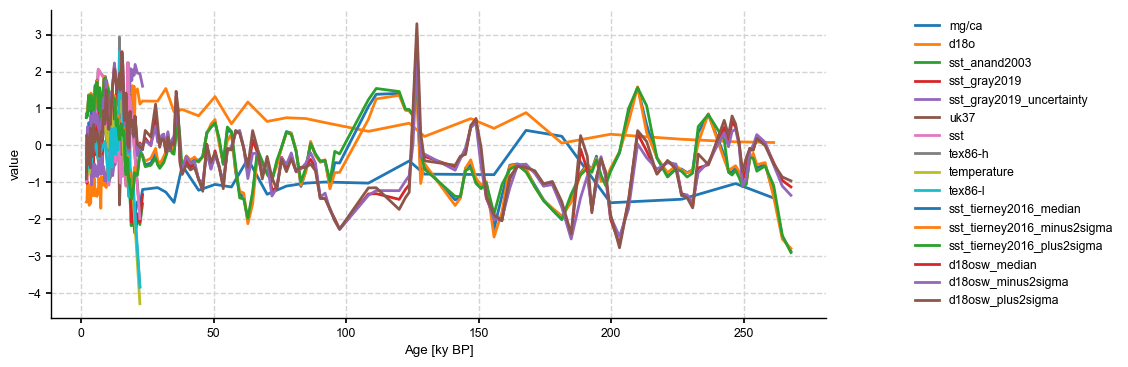

In [133]:
fig, ax = ms.standardize().plot(lgd_kwargs={'bbox_to_anchor': [1.1, 1]})

In [144]:
print(res)

NameError: name 'res' is not defined